In [1]:
# Instalar biblioteca watermark para visualização de ambiente e versões de pacotes foram usados no projeto
# %pip install -q -U watermark

In [2]:
# Importar bibliotecas
from datetime import datetime

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Importa bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('future.no_silent_downcasting', True)

# Detecção de Multicolinearidade 

* 	Evitar redundância

In [3]:
# Carregar base de dados
df=pd.read_csv("heart_disease_uci_tratado_3.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  num       920 non-null    int64  
 14  num_reag  920 non-null    int64  
dtypes: bool(2), float64(4), int64(4), object(5)
memory usage: 95.4+ KB


In [5]:
# Removendo colunas desnecessária 'num'
df.drop(columns=['id','num'], inplace=True)

##  Analise a matriz de correlação

In [6]:
# Seleciona apenas as colunas que são de tipos numéricos
numeric_df = df.select_dtypes(include=np.number)

In [7]:
# Calcula a matriz de correlação usando apenas o DataFrame numérico
# O método .corr() calcula a correlação de Pearson por padrão
correlation_matrix = numeric_df.corr()

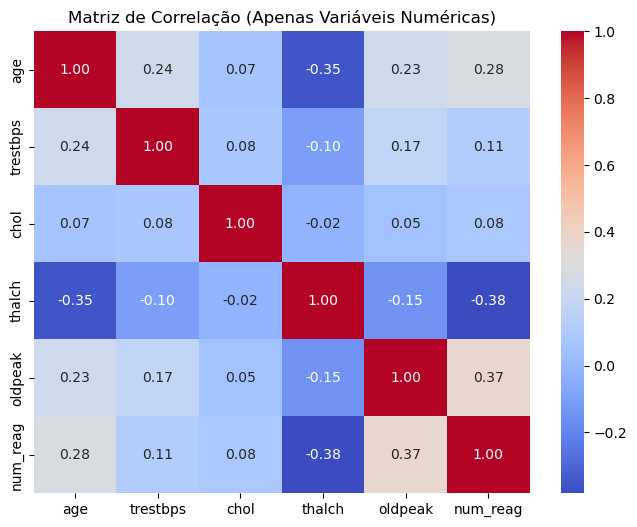

In [8]:
# Cria o heatmap para visualização
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (Apenas Variáveis Numéricas)')
plt.show()

### Incluir variáveis categóricas na análise de correlação

- aplicando abordagem **One-Hot Encoding**. One-Hot Encoding irá lidar com todas essas categorias automaticamente, transformando cada uma delas em colunas numéricas para que possam ser incluídas na análise de correlação.

In [9]:
# Cria uma cópia do DataFrame para o encoding
df_encoded = df.copy()

In [10]:
# A função get_dummies irá converter todas as colunas do tipo 'object' e 'bool' para um formato numérico (one-hot encoding).
# Usamos drop_first=True para evitar redundância nos dados.
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

In [11]:
# Agora que todas as colunas são numéricas, calculamos a matriz de correlação
correlation_matrix_full = df_encoded.corr()

In [12]:
# Para uma melhor visualização, vamos focar em como as outras variáveis se correlacionam com a sua variável alvo 'num_reag'.
# Vamos ordenar as correlações em relação a 'num_reag'.
corr_target = correlation_matrix_full[['num_reag']].sort_values(by='num_reag', ascending=False)

Gerando o heatmap completo...


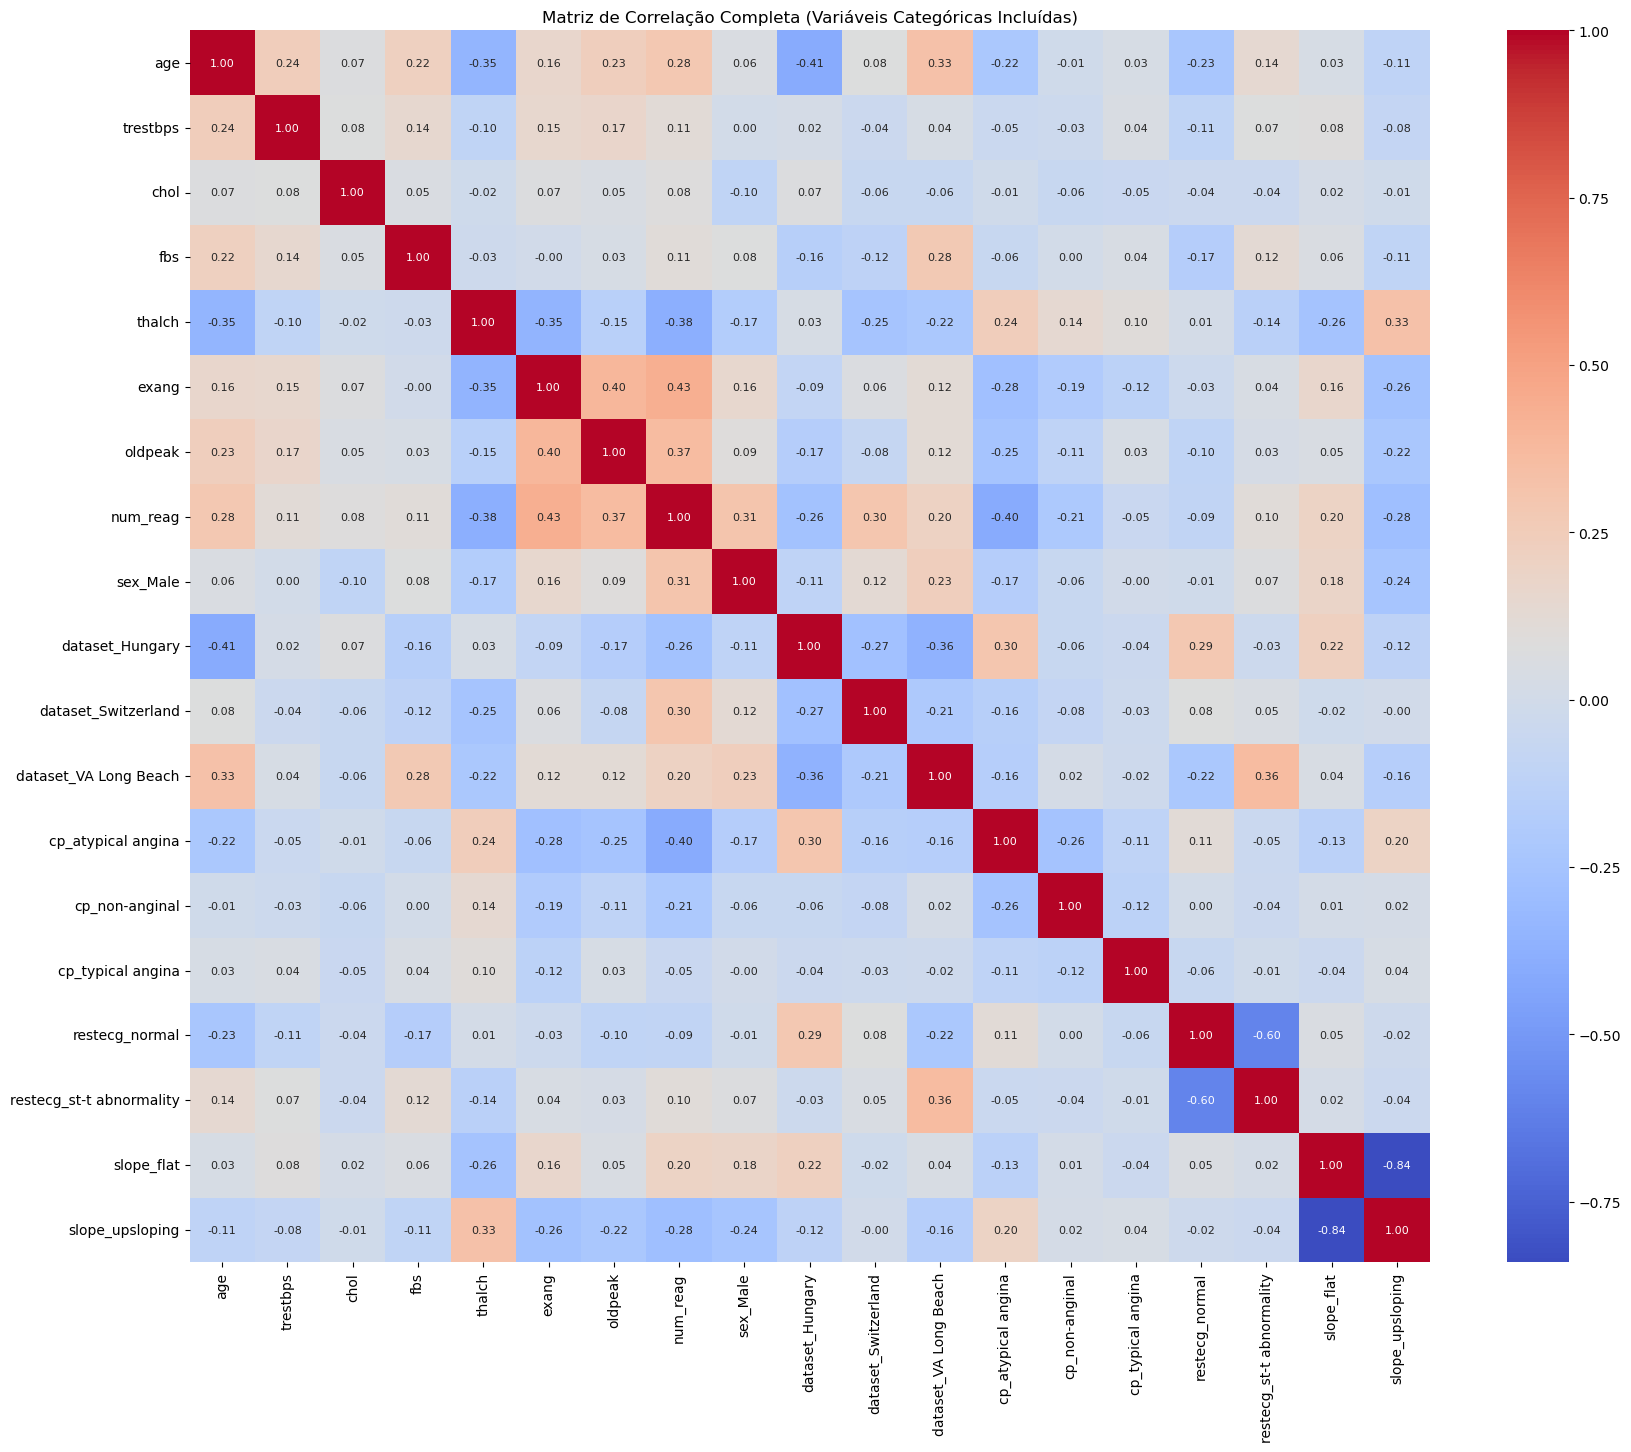

In [13]:
#  Heatmap completo
print("Gerando o heatmap completo...")
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix_full, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Matriz de Correlação Completa (Variáveis Categóricas Incluídas)')
plt.show()


Gerando o heatmap focado na correlação com 'num_reag'...


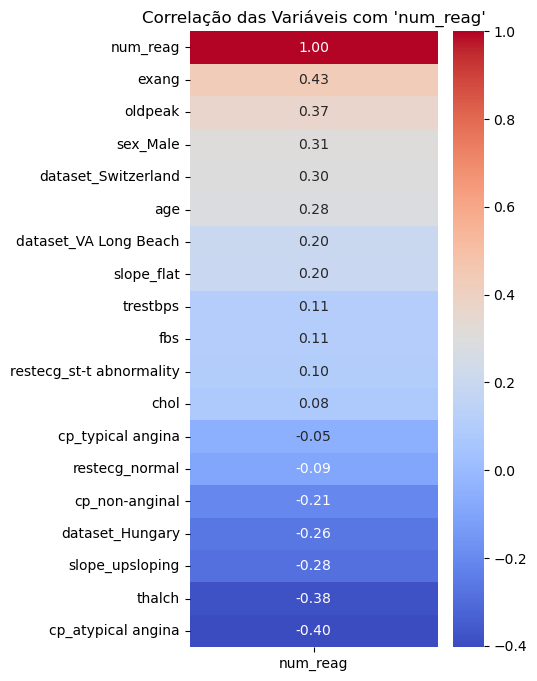

In [14]:
#  Heatmap focado na variável alvo 'num_reag'
print("\nGerando o heatmap focado na correlação com 'num_reag'...")
plt.figure(figsize=(4, 8))
sns.heatmap(corr_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação das Variáveis com 'num_reag'")
plt.show()

## Calcular VIF (Fator de Inflação da Variância)  para as variáveis explicativas

O VIF é uma medida excelente para detectar a multicolinearidade entre as variáveis explicativas (ou independentes). Um valor de VIF alto (geralmente acima de 5 ou 10) para uma variável indica que ela está altamente correlacionada com outras variáveis no modelo.

In [15]:
# Cria uma cópia do DataFrame para o encoding
df_vif = df_encoded.copy()

In [16]:
# PREPARAÇÃO DOS DADOS (ONE-HOT ENCODING)
df_vif= pd.get_dummies(df, drop_first=True, dtype=int)

In [17]:
# Removemos colunas de identificação e as variáveis alvo ('num_reag')
X = df_vif.drop(columns=['num_reag'])

In [18]:
# Adicionar uma constante (intercepto), necessário para o cálculo do VIF
X_with_const = sm.add_constant(X)

In [19]:
# Força todas as colunas em X para o tipo float para garantir compatibilidade
X = X.astype(float)

# Adicionar uma constante (intercepto)
X_with_const = sm.add_constant(X)

In [20]:
# CÁLCULO DO VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Remover o VIF da constante
vif_data = vif_data[vif_data["feature"] != "const"]

# Ordenar os resultados
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)
    
# EXIBIR OS RESULTADOS
print("Cálculo do Fator de Inflação da Variância (VIF):")
print(vif_data_sorted)

Cálculo do Fator de Inflação da Variância (VIF):
                     feature       VIF
18           slope_upsloping  4.258067
17                slope_flat  3.878644
9            dataset_Hungary  2.283699
16  restecg_st-t abnormality  2.229340
11     dataset_VA Long Beach  2.109487
15            restecg_normal  2.096998
10       dataset_Switzerland  1.755021
5                     thalch  1.631955
1                        age  1.589540
12        cp_atypical angina  1.523146
6                      exang  1.485723
7                    oldpeak  1.441470
13            cp_non-anginal  1.301192
8                   sex_Male  1.178582
4                        fbs  1.166822
2                   trestbps  1.139023
14         cp_typical angina  1.125438
3                       chol  1.060232


**Interpretação**
O VIF mede o quanto a variância de um coeficiente de regressão é "inflada" pela presença de outras variáveis explicativas. Em termos simples, ele nos diz o quão forte é a correlação entre uma variável e todas as outras.

A regra geral para interpretar o VIF é:

* **VIF = 1: Não há correlação.**
* **1 < VIF < 5: Correlação moderada (geralmente aceitável).**
* **VIF > 5 ou 10: Correlação alta, indicando um problema de multicolinearidade.**

**Conclusão**

Com base nesses valores de VIF (Fator de Inflação da Variância), **não há sinais de multicolinearidade problemática no conjunto de dados**. 
* **Todas as variáveis estão dentro de um limite aceitável.**
* **Não precisa remover nenhuma variável devido à multicolinearidade.**

In [21]:
# Carregando a extensão watermark
%reload_ext watermark

In [22]:
# Imprimir
# -a (autor do projeto)
# -v (versões do Python e do IPython)
# -m (informações sobre a máquina (hardware e sistema operacional))
# --iversions (versões de pacotes importadas (import))
agora = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
%watermark -a "Patrick F. R. Ribeiro" -v -m --iversions
print(f"Última atualização: {agora}")

Author: Patrick F. R. Ribeiro

Python implementation: CPython
Python version       : 3.13.5
IPython version      : 8.30.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit

seaborn    : 0.13.2
statsmodels: 0.14.4
numpy      : 1.26.4
pandas     : 2.2.3
matplotlib : 3.10.0

Última atualização: 2025-09-20 10:40:44
